In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import matplotlib

from write_read_cache import store_data, read_data
from read_events import read_events, get_events

cache_folder = "cache/pedestal"


In [2]:
# Get raw pedestal data from automated testF
def get_pedestal_mean(filepath_ped, ch):

    raw_pedestals = pd.read_csv(filepath_ped, sep="\t", comment="#", header=None)
    raw_pedestals_ch = raw_pedestals[raw_pedestals.loc[:, 3] == ch]
    raw_pedestals_ch = raw_pedestals_ch.loc[:, 4].to_numpy()

    mean_ped = np.mean(raw_pedestals_ch)
    ped_auto = mean_ped

    return ped_auto


# Get raw pedestal data from automated test
def get_pedestal_data(filepath_ped, ch):

    raw_pedestals = pd.read_csv(filepath_ped, sep="\t", comment="#", header=None)
    raw_pedestals_ch = raw_pedestals[raw_pedestals.loc[:, 3] == ch]
    raw_pedestals_ch = raw_pedestals_ch.loc[:, 4].to_numpy()

    return raw_pedestals_ch


In [3]:
# Function to build pedestal dataframe


def read_pedestal(df, temperature, pressure, filepath):
    channels = range(0, 32)
    for ch in channels:
        ped_amb_amb = get_pedestal_data(
            filepath,
            ch,
        )
        for x in ped_amb_amb:
            row_to_append = pd.DataFrame(
                {
                    "temperature": [temperature],
                    "pressure": [pressure],
                    "ch": [ch],
                    "pedestal": [x],
                }
            )
            df = pd.concat([df, row_to_append])

    return df


In [4]:
# Get pedestal data
# Save pedestals of all channels at all temperatures and pressures
ped_alltemps_press = pd.DataFrame(columns=["temperature", "pressure", "ch", "pedestal"])

# T amb and P amb
ped_alltemps_press = read_pedestal(
    ped_alltemps_press,
    25,
    1013.25,
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\16_02_2023\5_auto_Tamb_Pamb\data\Pedestals_tau5.dat",
)

# -45 C, 10 mBar
ped_alltemps_press = read_pedestal(
    ped_alltemps_press,
    -45,
    10,
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\20_02_2023\0_auto_-45C_10mbar\data\Pedestals_tau5.dat",
)

# -45 C, 6 mBar
ped_alltemps_press = read_pedestal(
    ped_alltemps_press,
    -45,
    6,
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\20_02_2023\2_auto_-45C_6mbar\data\Pedestals_tau5.dat",
)

# -45 C, 3 mBar
ped_alltemps_press = read_pedestal(
    ped_alltemps_press,
    -45,
    3,
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\20_02_2023\3_auto_-45C_3mbar\data\Pedestals_tau5.dat",
)

# -50 C, 3 mBar
ped_alltemps_press = read_pedestal(
    ped_alltemps_press,
    -50,
    3,
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\21_02_2023\2_auto_-55C_3mbar\data\Pedestals_tau5.dat",
)

# -50 C, 6 mBar
ped_alltemps_press = read_pedestal(
    ped_alltemps_press,
    -50,
    6,
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\21_02_2023\6_auto_-55C_6mbar\data\Pedestals_tau5.dat",
)

# -50 C, 10 mBar
ped_alltemps_press = read_pedestal(
    ped_alltemps_press,
    -50,
    10,
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\21_02_2023\10_auto_-55C_10mbar\data\Pedestals_tau5.dat",
)

# 0 C, 3 mBar
ped_alltemps_press = read_pedestal(
    ped_alltemps_press,
    0,
    3,
    r"C:\Users\ghisl\Google Drive UniBG\UniBG\CORSI\PhD\GAPS\INFN_Napoli\TVAC_test\GAPS_Test_CIRA\MODULE029_fast\22_02_2023\2_auto_0C_3mbar\data\Pedestals_tau5.dat",
)


store_data(ped_alltemps_press, "ped_alltemps_press", cache_folder)


In [5]:
# Function to reject outliers from array

def reject_outliers(data, m):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d / mdev if mdev else np.zeros(len(d))
    return data[s < m]


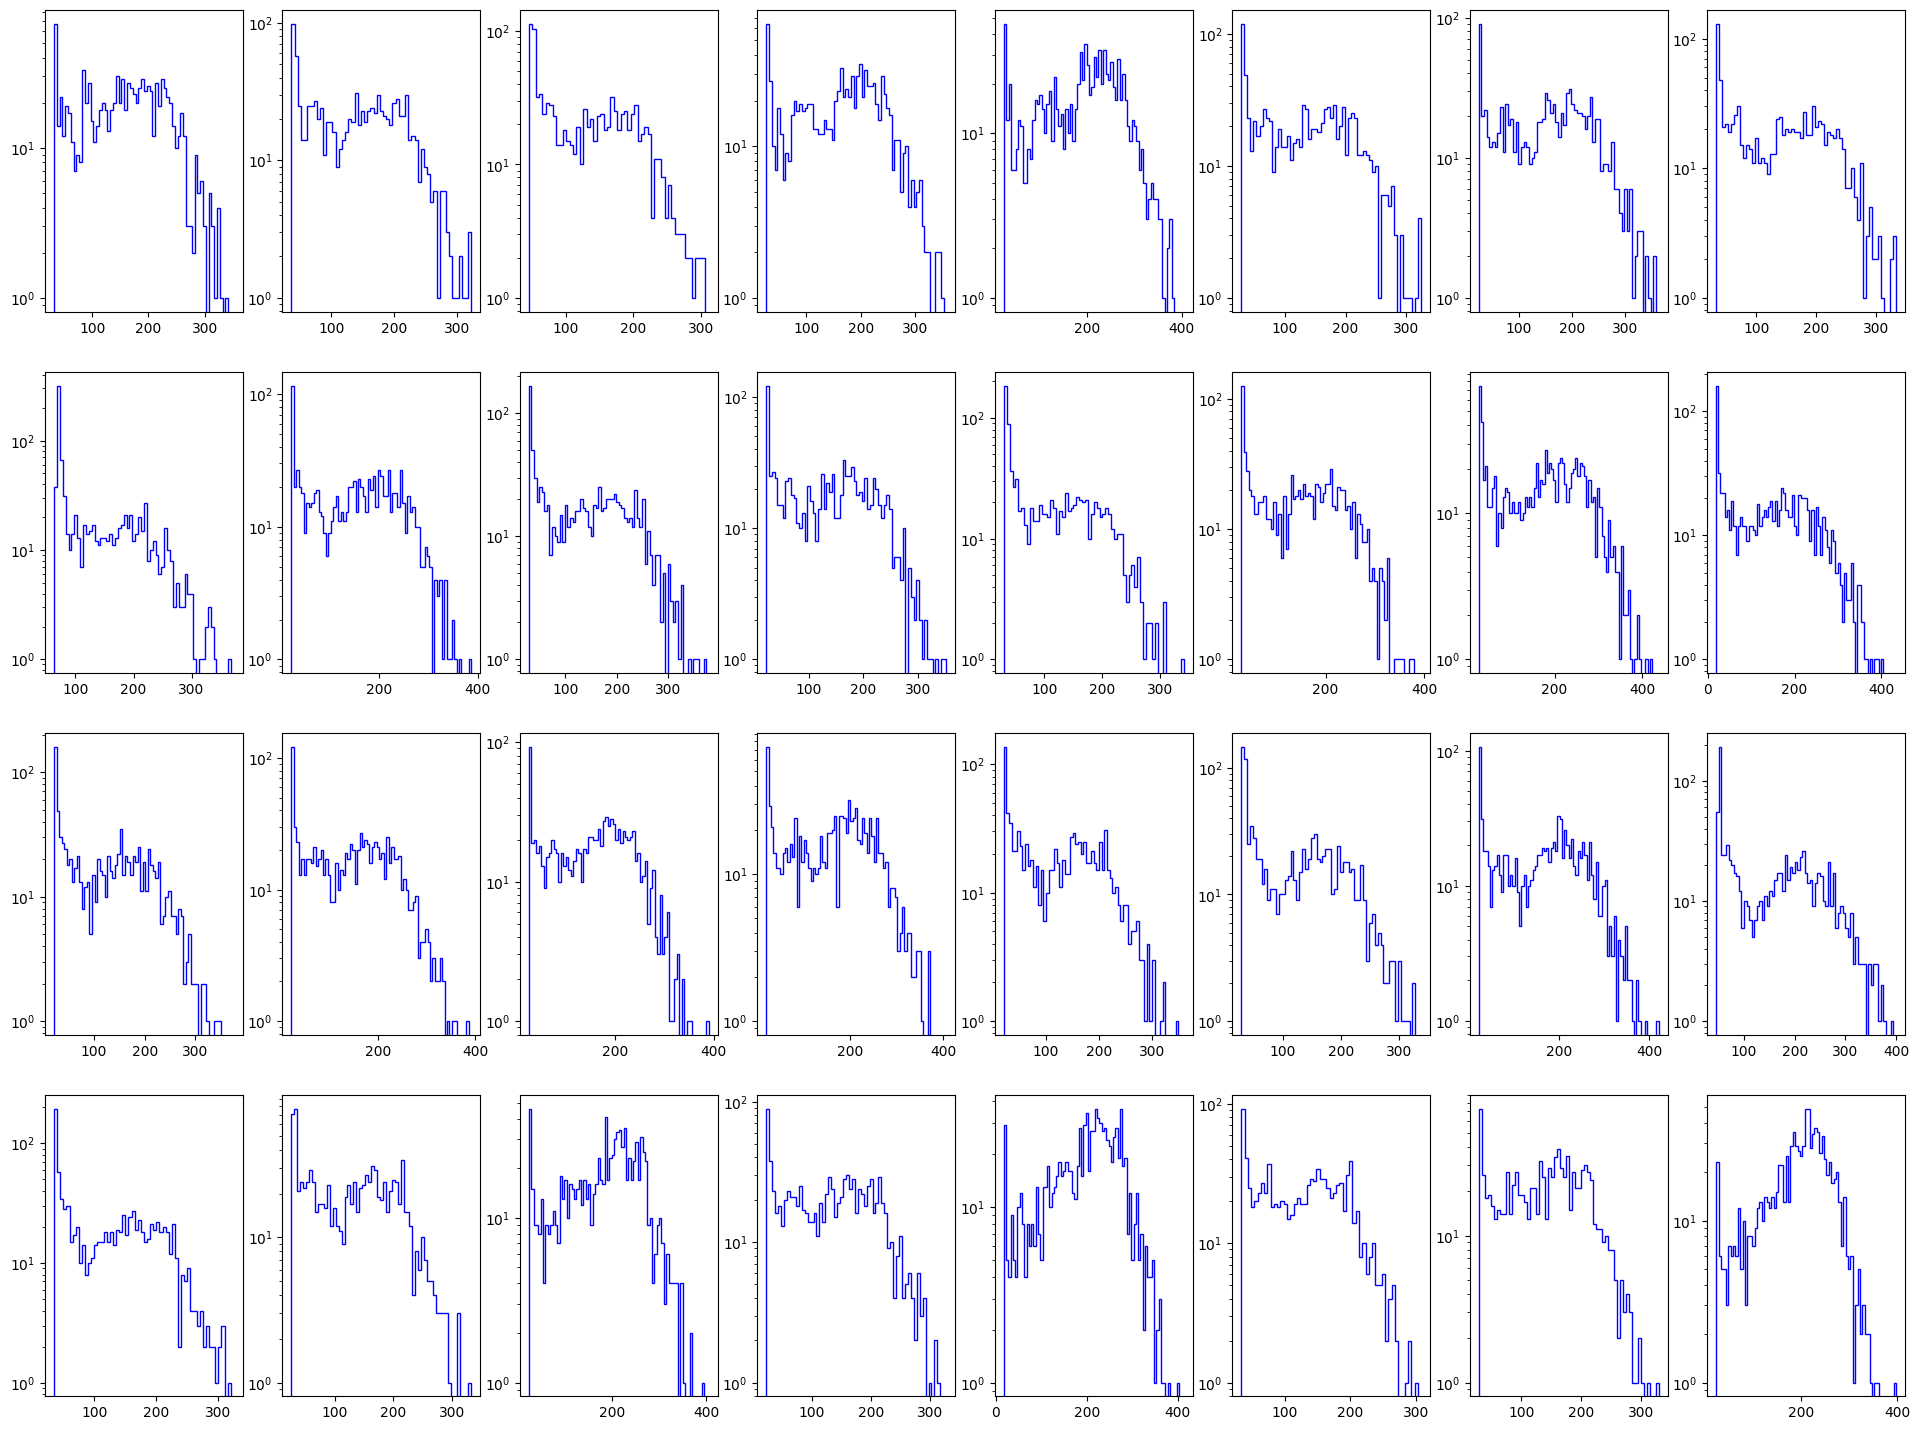

In [13]:
# Plot pedestal
# -50 C, 3 mbar
ped_alltemps_press = read_data("ped_alltemps_press", cache_folder)

channels = range(0, 32)
matplotlib.rcParams["figure.figsize"] = [8 * 3, 6 * 3]
plt.clf()
for ch in channels:
    plt.subplot(4, 8, ch + 1)
    ped_temp_press_ch = ped_alltemps_press[
        (ped_alltemps_press["temperature"] == -50)
        & (ped_alltemps_press["pressure"] == 3)
        & (ped_alltemps_press["ch"] == ch)
    ]["pedestal"]
    ped_temp_press_ch = reject_outliers(ped_temp_press_ch, np.mean(ped_temp_press_ch))
    plt.hist(
        ped_temp_press_ch,
        bins=np.arange(min(ped_temp_press_ch), max(ped_temp_press_ch), 5),
        histtype="step",
        stacked=True,
        fill=False,
        color="blue",
    )

    # plt.xlim([100, 200])
    plt.yscale("log")

plt.show()


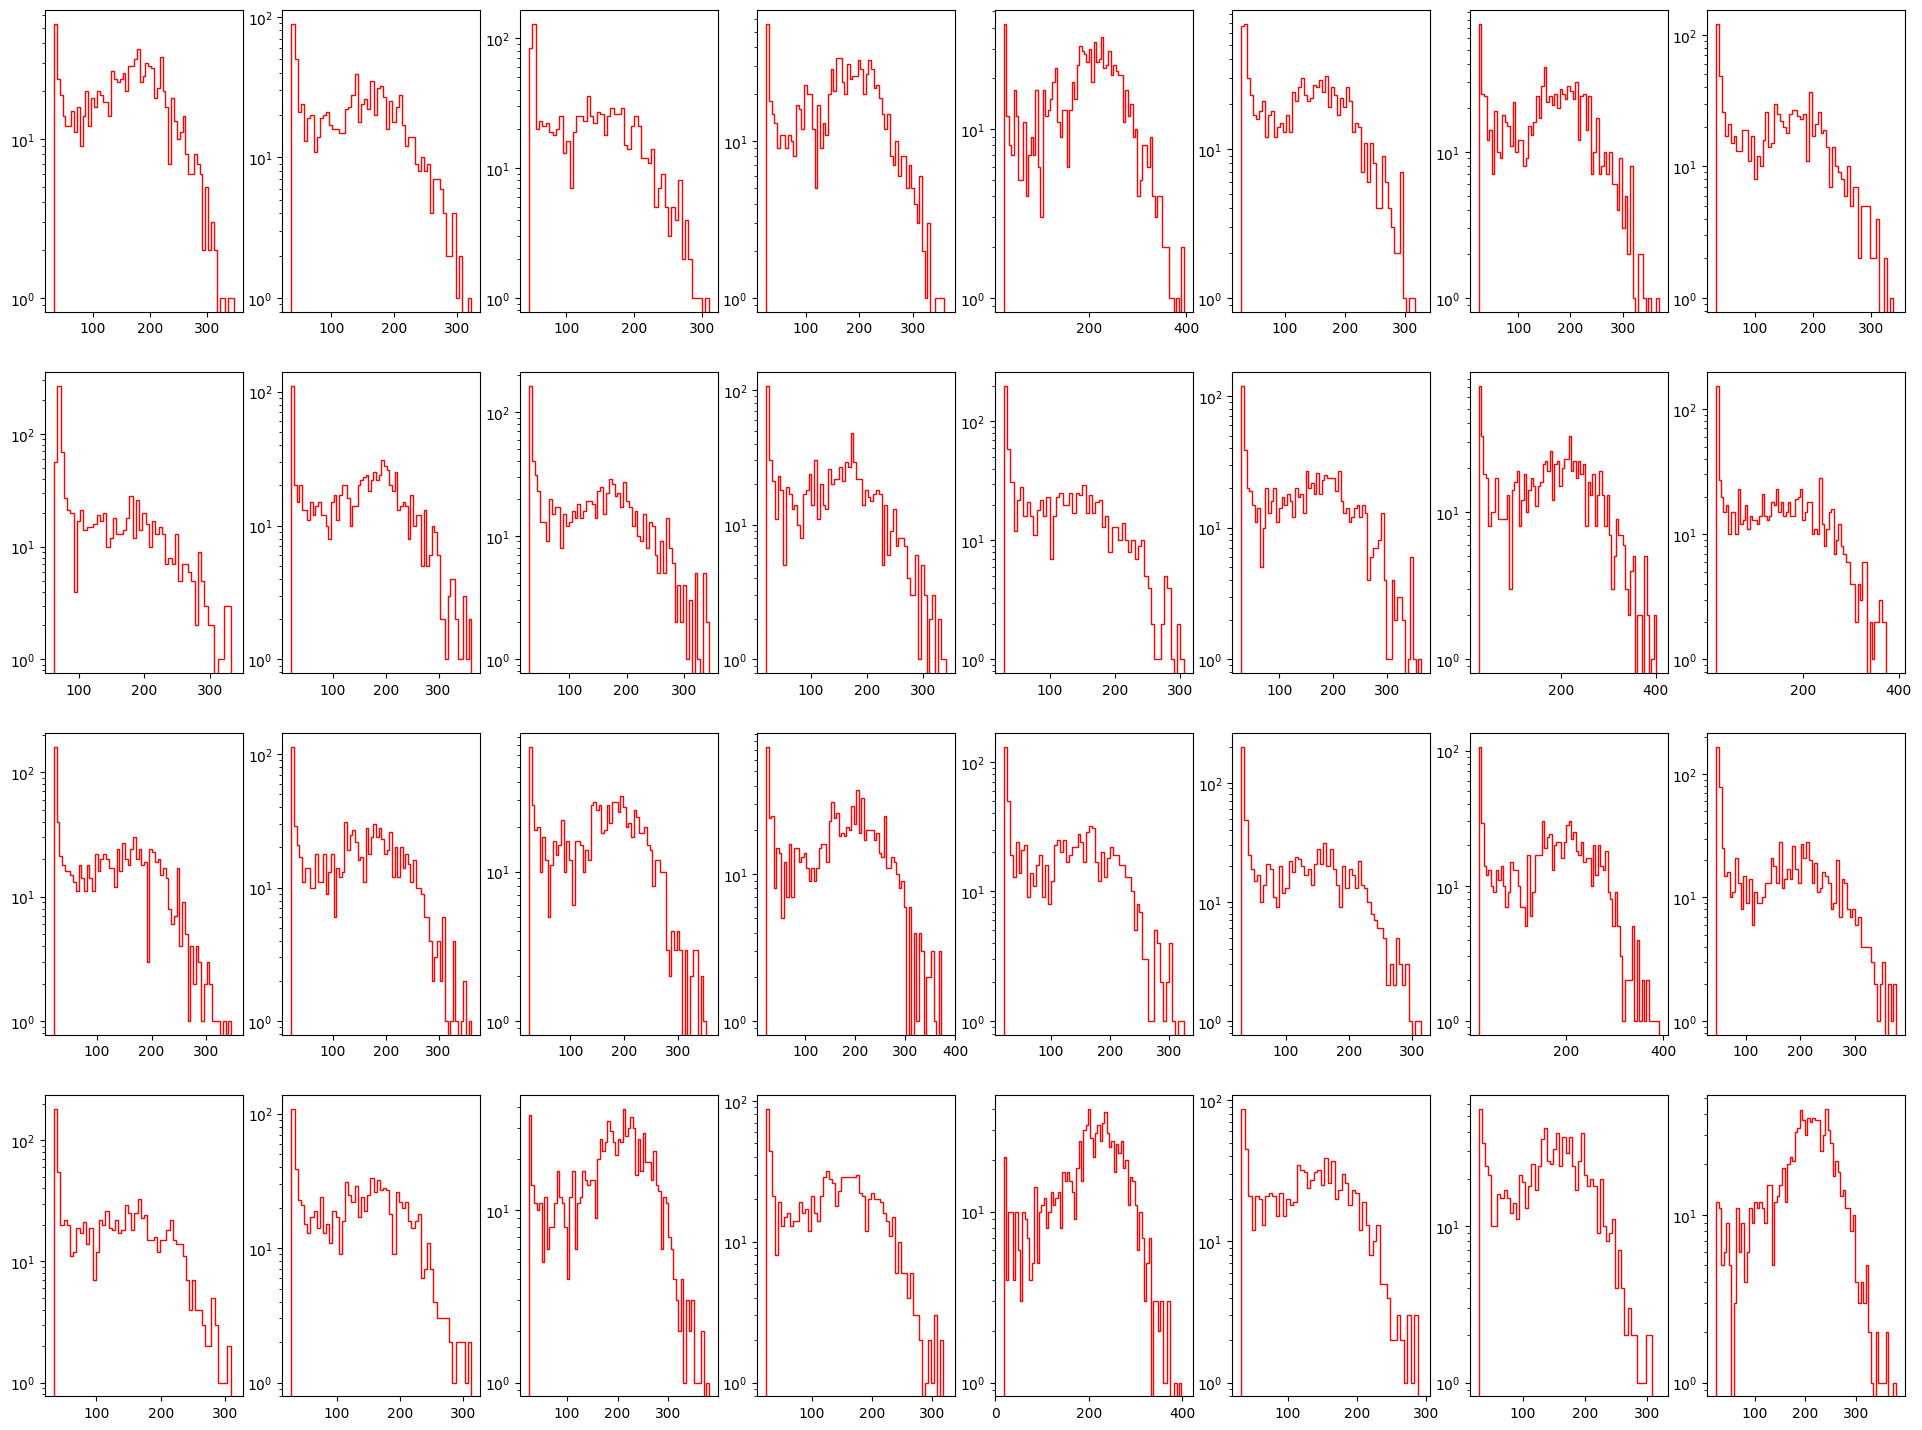

In [12]:
# Plot pedestal
# -50 C, 6 mbar
ped_alltemps_press = read_data("ped_alltemps_press", cache_folder)

channels = range(0, 32)
matplotlib.rcParams["figure.figsize"] = [8 * 3, 6 * 3]
plt.clf()
for ch in channels:
    plt.subplot(4, 8, ch + 1)
    ped_temp_press_ch = ped_alltemps_press[
        (ped_alltemps_press["temperature"] == -50)
        & (ped_alltemps_press["pressure"] == 6)
        & (ped_alltemps_press["ch"] == ch)
    ]["pedestal"]
    ped_temp_press_ch = reject_outliers(ped_temp_press_ch, np.mean(ped_temp_press_ch))
    plt.hist(
        ped_temp_press_ch,
        bins=np.arange(min(ped_temp_press_ch), max(ped_temp_press_ch), 5),
        histtype="step",
        stacked=True,
        fill=False,
        color="red",
    )

    # plt.xlim([100, 200])
    plt.yscale("log")

plt.show()


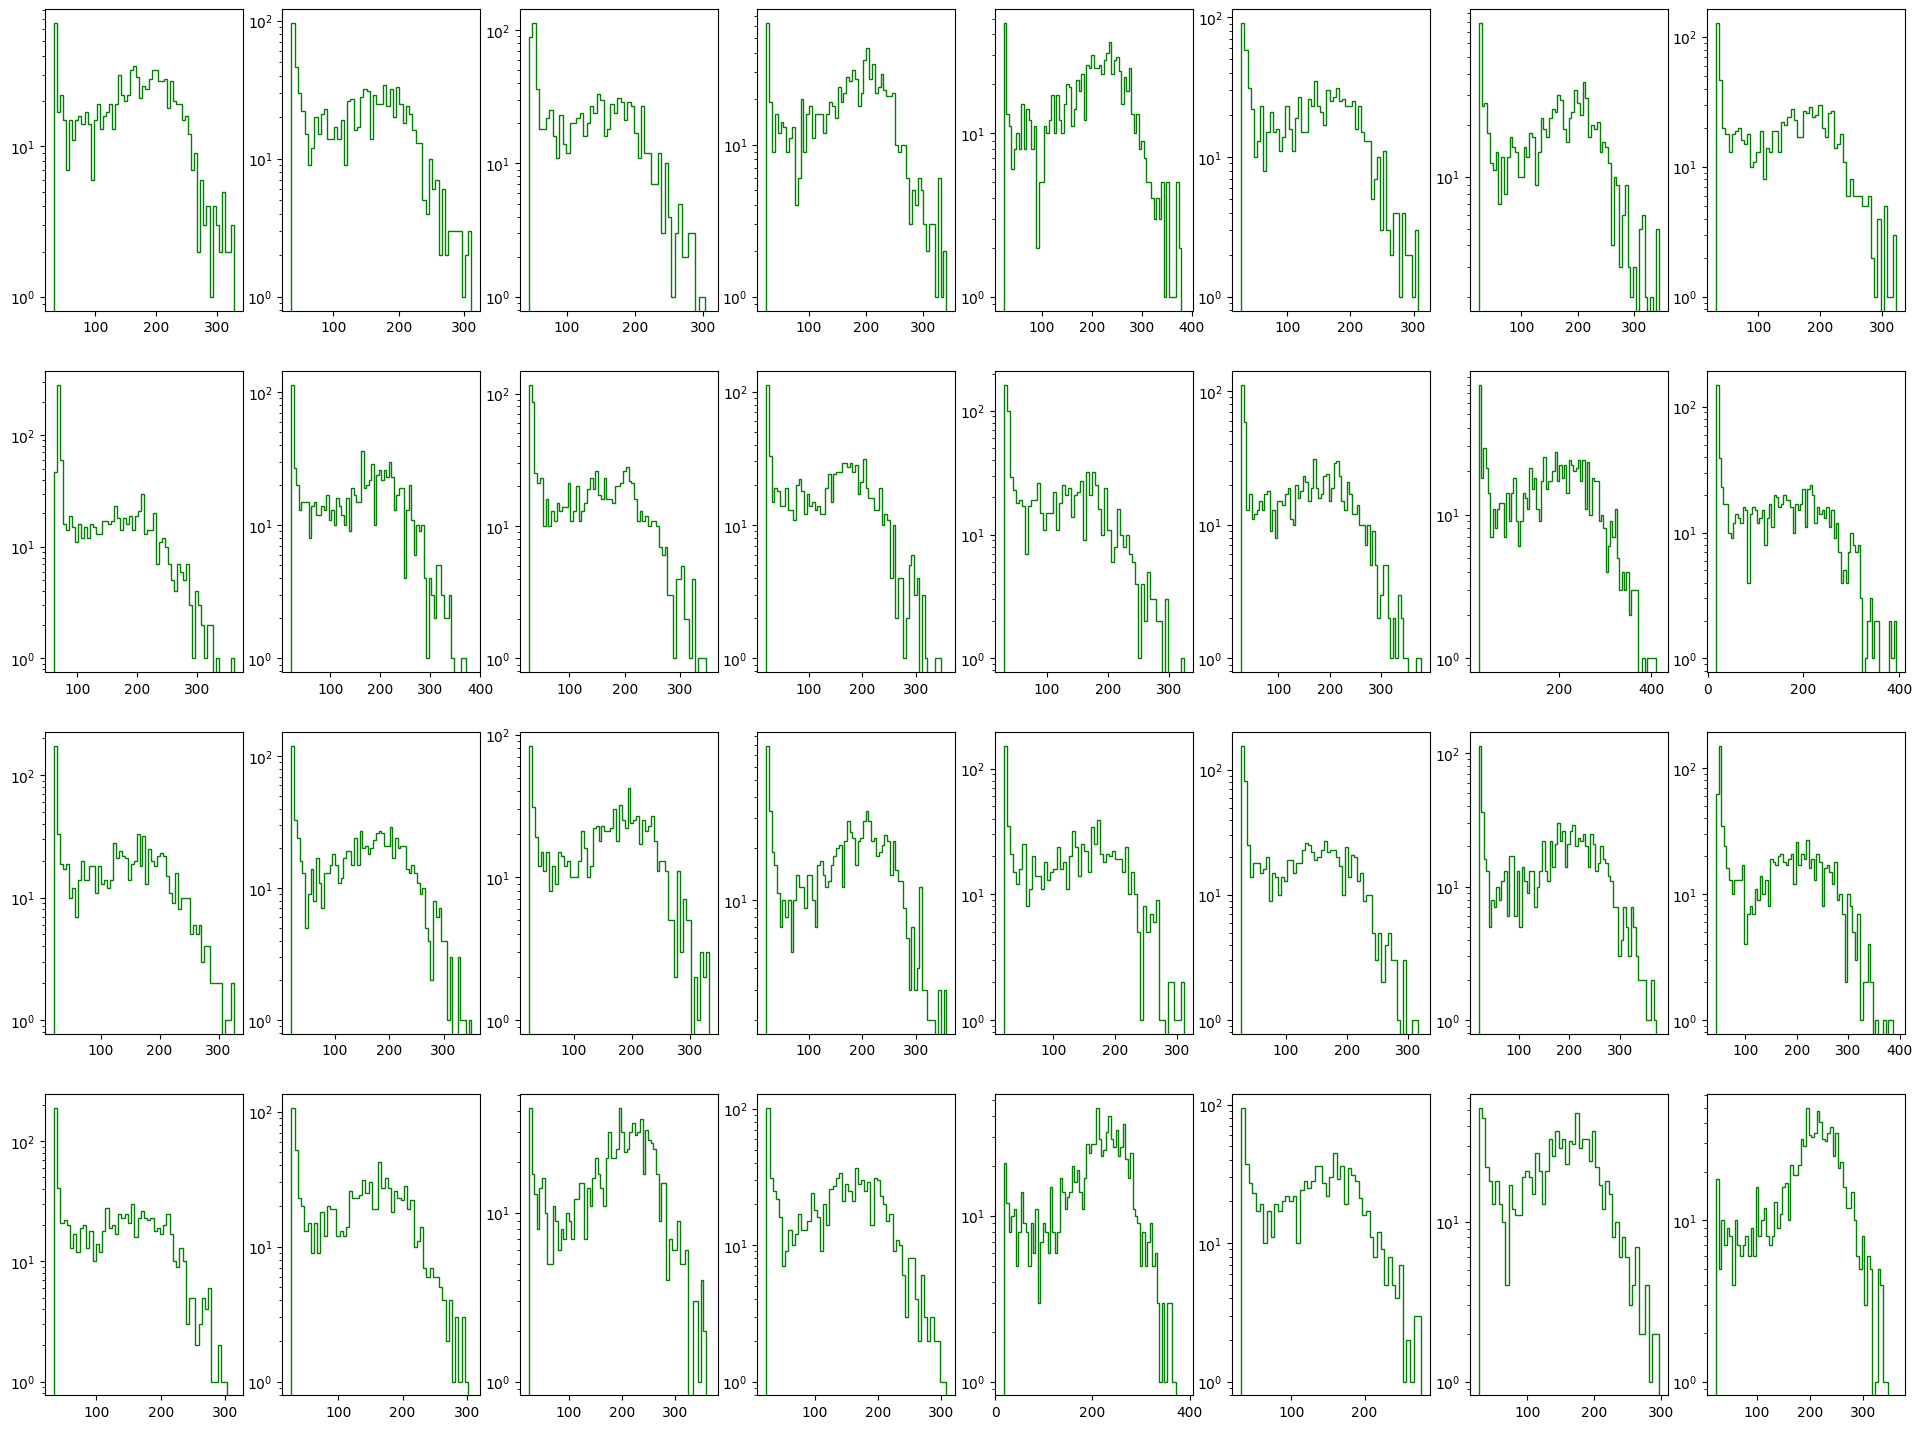

In [14]:
# Plot pedestal
# -50 C, 10 mbar
ped_alltemps_press = read_data("ped_alltemps_press", cache_folder)

channels = range(0, 32)
matplotlib.rcParams["figure.figsize"] = [8 * 3, 6 * 3]
plt.clf()
for ch in channels:
    plt.subplot(4, 8, ch + 1)
    ped_temp_press_ch = ped_alltemps_press[
        (ped_alltemps_press["temperature"] == -50)
        & (ped_alltemps_press["pressure"] == 10)
        & (ped_alltemps_press["ch"] == ch)
    ]["pedestal"]
    ped_temp_press_ch = reject_outliers(ped_temp_press_ch, np.mean(ped_temp_press_ch))
    plt.hist(
        ped_temp_press_ch,
        bins=np.arange(min(ped_temp_press_ch), max(ped_temp_press_ch), 5),
        histtype="step",
        stacked=True,
        fill=False,
        color="green",
    )

    # plt.xlim([100, 200])
    plt.yscale("log")

plt.show()


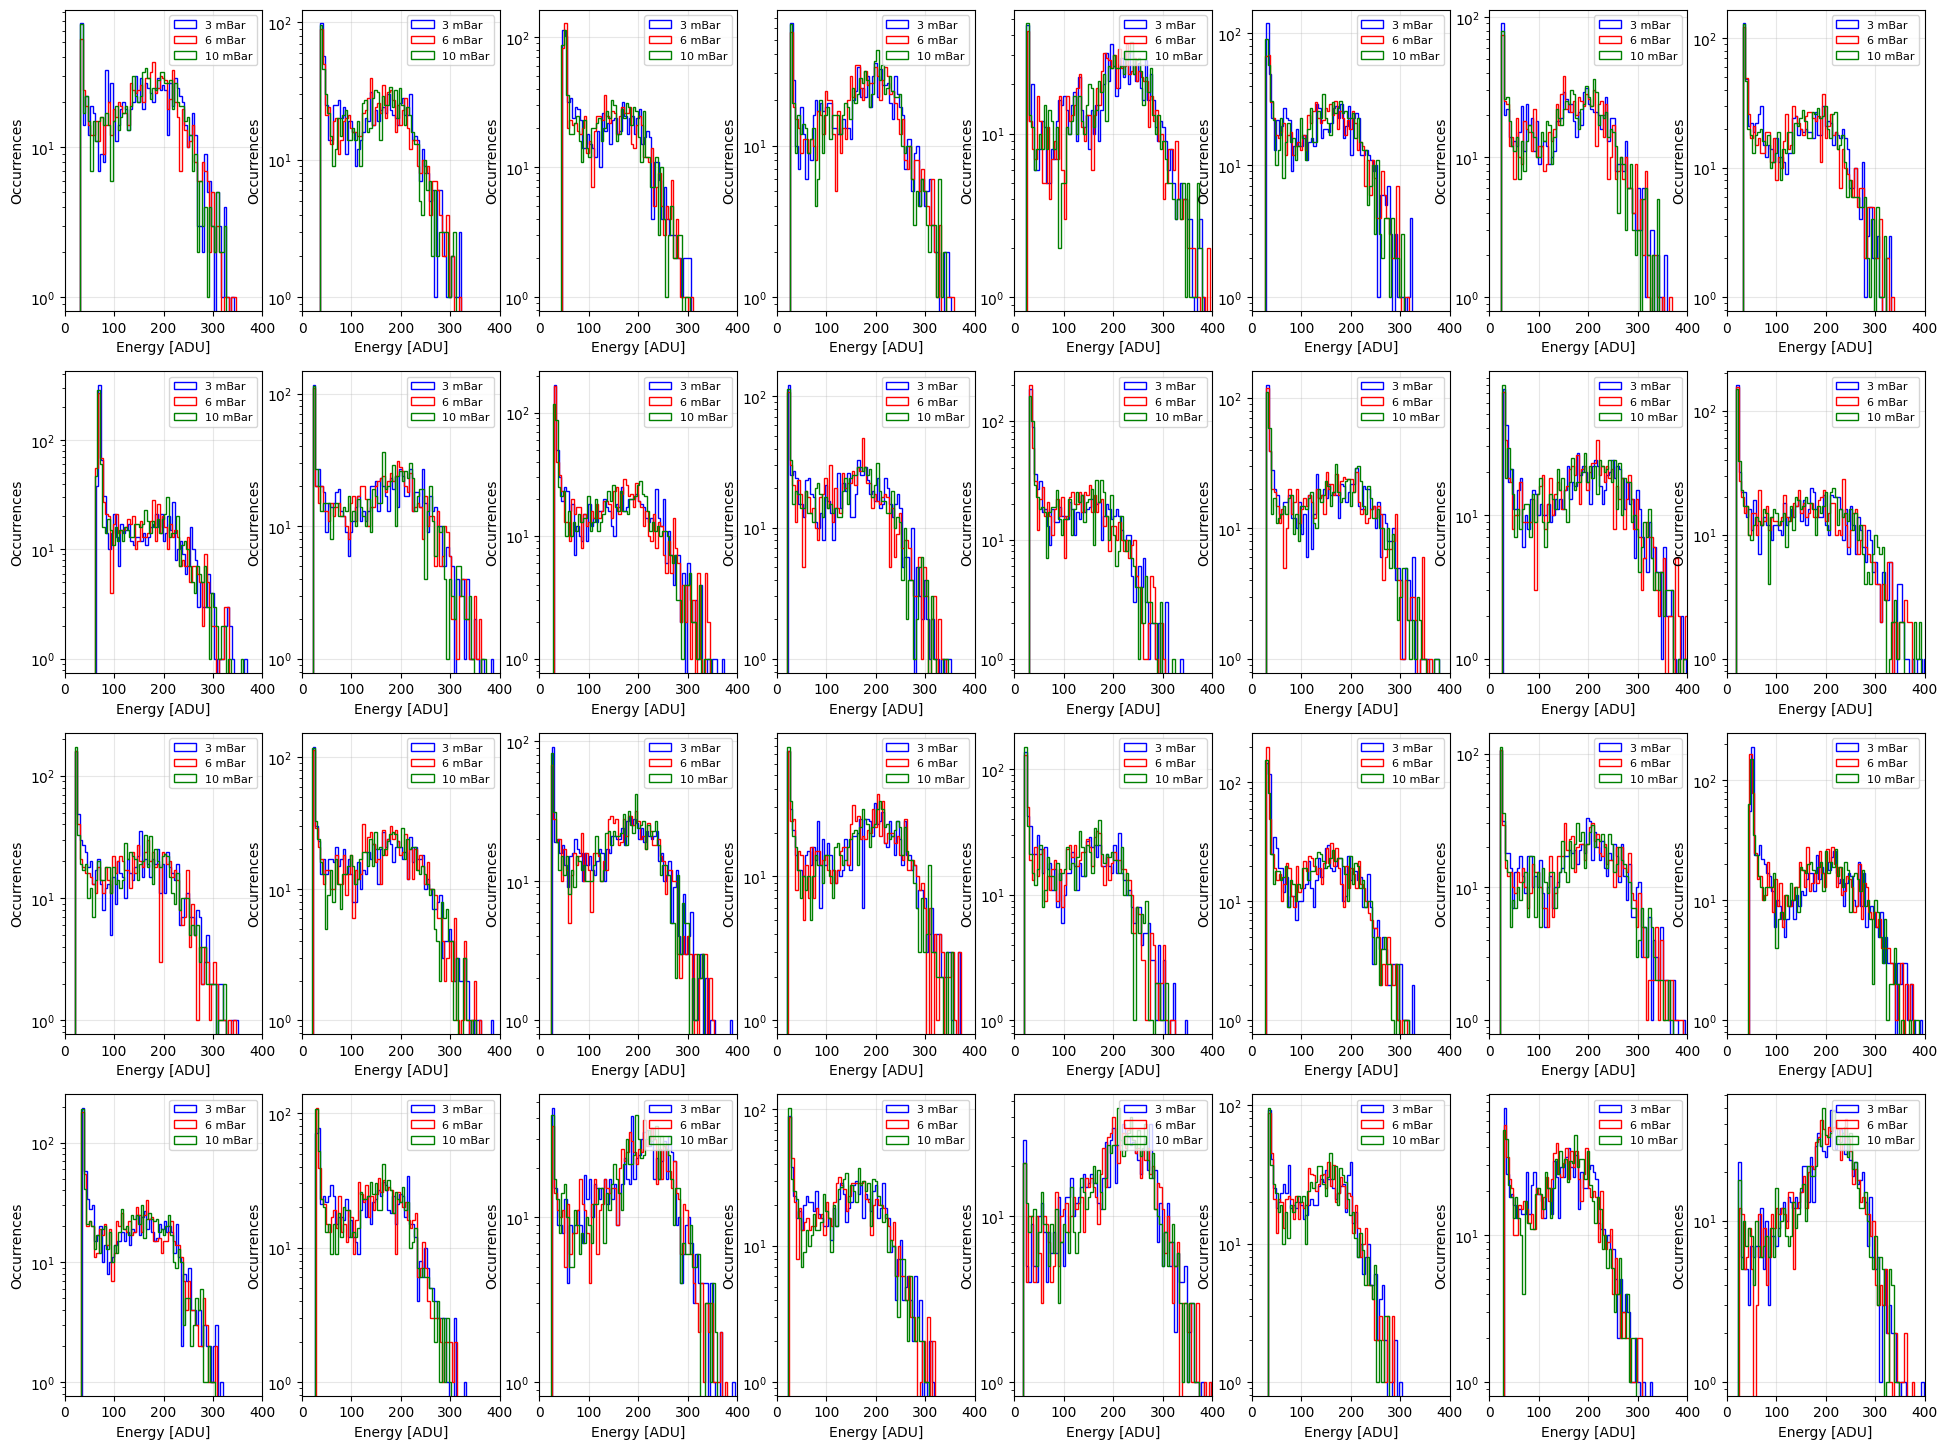

In [38]:
# Plot pedestal at -50 and 3, 6, 10 mbar

ped_alltemps_press = read_data("ped_alltemps_press", cache_folder)

channels = range(0, 32)
matplotlib.rcParams["figure.figsize"] = [8 * 3, 6 * 3]
plt.clf()
for ch in channels:
    plt.subplot(4, 8, ch + 1)
    ped_temp_press_ch = ped_alltemps_press[
        (ped_alltemps_press["temperature"] == -50)
        & (ped_alltemps_press["pressure"] == 3)
        & (ped_alltemps_press["ch"] == ch)
    ]["pedestal"]
    ped_temp_press_ch = reject_outliers(ped_temp_press_ch, np.mean(ped_temp_press_ch))
    plt.hist(
        ped_temp_press_ch,
        bins=np.arange(min(ped_temp_press_ch), max(ped_temp_press_ch), 5),
        histtype="step",
        stacked=True,
        fill=False,
        color="blue",
        label="3 mBar",
    )

    ped_temp_press_ch = ped_alltemps_press[
        (ped_alltemps_press["temperature"] == -50)
        & (ped_alltemps_press["pressure"] == 6)
        & (ped_alltemps_press["ch"] == ch)
    ]["pedestal"]
    ped_temp_press_ch = reject_outliers(ped_temp_press_ch, np.mean(ped_temp_press_ch))
    plt.hist(
        ped_temp_press_ch,
        bins=np.arange(min(ped_temp_press_ch), max(ped_temp_press_ch), 5),
        histtype="step",
        stacked=True,
        fill=False,
        color="red",
        label="6 mBar",
    )

    ped_temp_press_ch = ped_alltemps_press[
        (ped_alltemps_press["temperature"] == -50)
        & (ped_alltemps_press["pressure"] == 10)
        & (ped_alltemps_press["ch"] == ch)
    ]["pedestal"]
    ped_temp_press_ch = reject_outliers(ped_temp_press_ch, np.mean(ped_temp_press_ch))
    plt.hist(
        ped_temp_press_ch,
        bins=np.arange(min(ped_temp_press_ch), max(ped_temp_press_ch), 5),
        histtype="step",
        stacked=True,
        fill=False,
        color="green",
        label="10 mBar",
    )

    plt.legend(loc="upper right", fontsize=8)
    plt.grid(alpha=0.3)
    plt.yscale("log")
    plt.xlabel("Energy [ADU]")
    plt.ylabel("Occurrences")
    plt.xlim([0, 400])


plt.show()


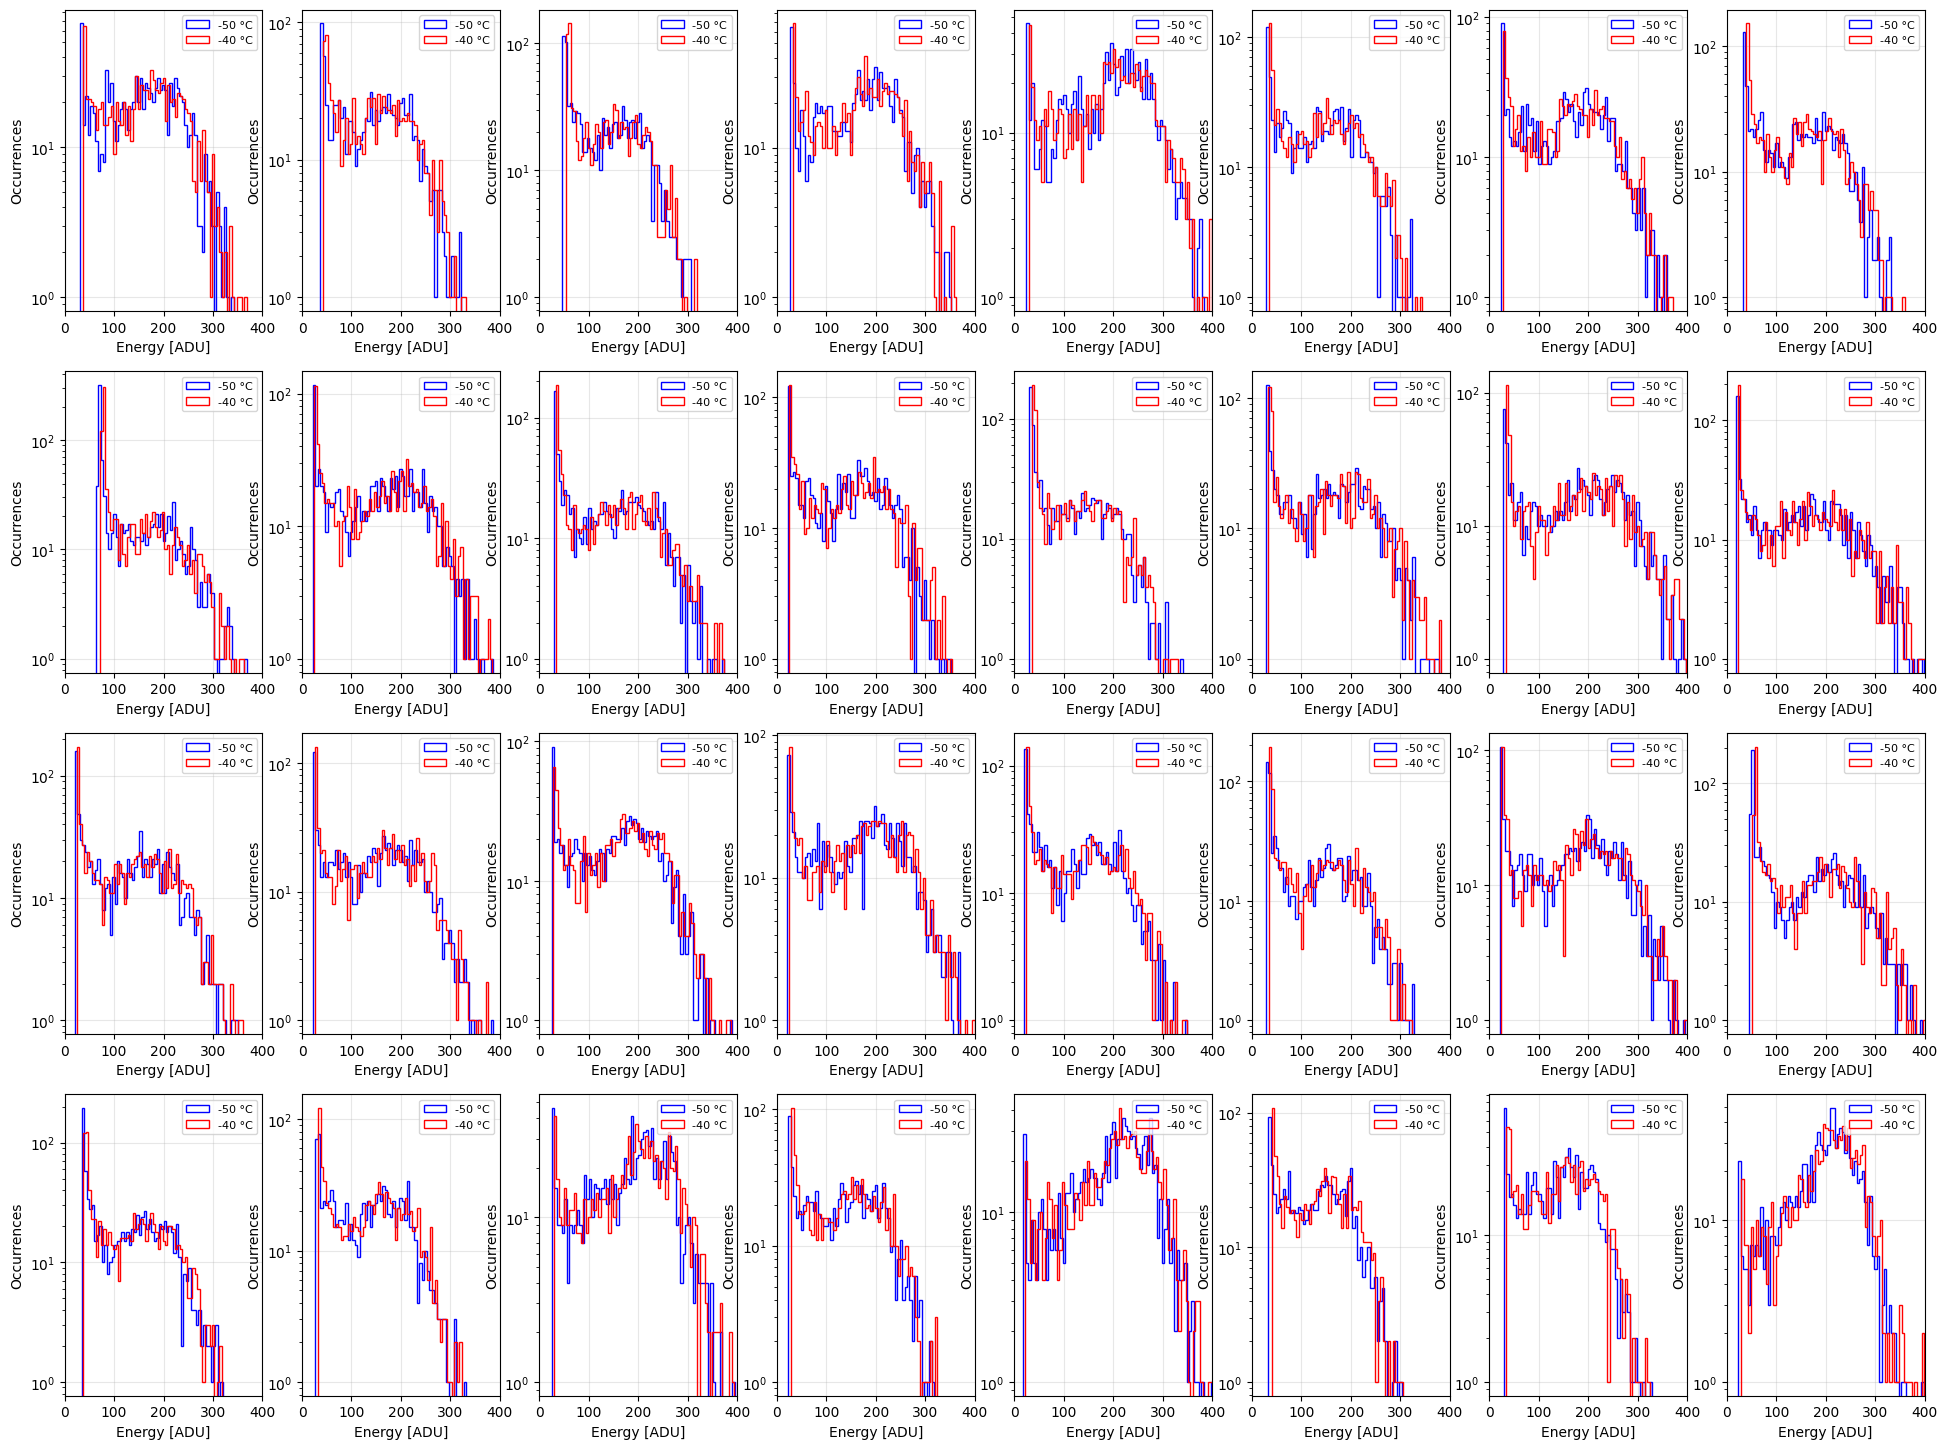

In [39]:
# Plot pedestal at 3 mbar at -50 and -40

ped_alltemps_press = read_data("ped_alltemps_press", cache_folder)

channels = range(0, 32)
matplotlib.rcParams["figure.figsize"] = [8 * 3, 6 * 3]
plt.clf()
for ch in channels:
    plt.subplot(4, 8, ch + 1)
    ped_temp_press_ch = ped_alltemps_press[
        (ped_alltemps_press["temperature"] == -50)
        & (ped_alltemps_press["pressure"] == 3)
        & (ped_alltemps_press["ch"] == ch)
    ]["pedestal"]
    ped_temp_press_ch = reject_outliers(ped_temp_press_ch, np.mean(ped_temp_press_ch))
    plt.hist(
        ped_temp_press_ch,
        bins=np.arange(min(ped_temp_press_ch), max(ped_temp_press_ch), 5),
        histtype="step",
        stacked=True,
        fill=False,
        color="blue",
        label="-50 °C",
    )

    ped_temp_press_ch = ped_alltemps_press[
        (ped_alltemps_press["temperature"] == -45)
        & (ped_alltemps_press["pressure"] == 3)
        & (ped_alltemps_press["ch"] == ch)
    ]["pedestal"]
    ped_temp_press_ch = reject_outliers(ped_temp_press_ch, np.mean(ped_temp_press_ch))
    plt.hist(
        ped_temp_press_ch,
        bins=np.arange(min(ped_temp_press_ch), max(ped_temp_press_ch), 5),
        histtype="step",
        stacked=True,
        fill=False,
        color="red",
        label="-40 °C",
    )

    plt.legend(loc="upper right", fontsize=8)
    plt.grid(alpha=0.3)
    plt.yscale("log")
    plt.xlabel("Energy [ADU]")
    plt.ylabel("Occurrences")
    plt.xlim([0, 400])


plt.show()


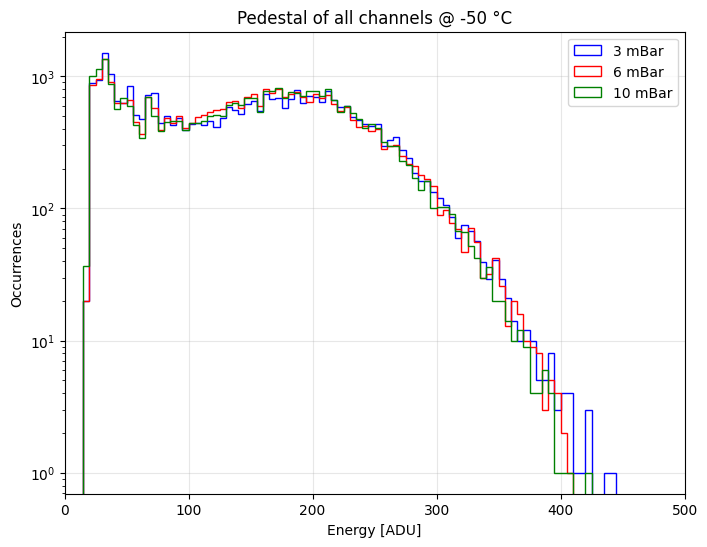

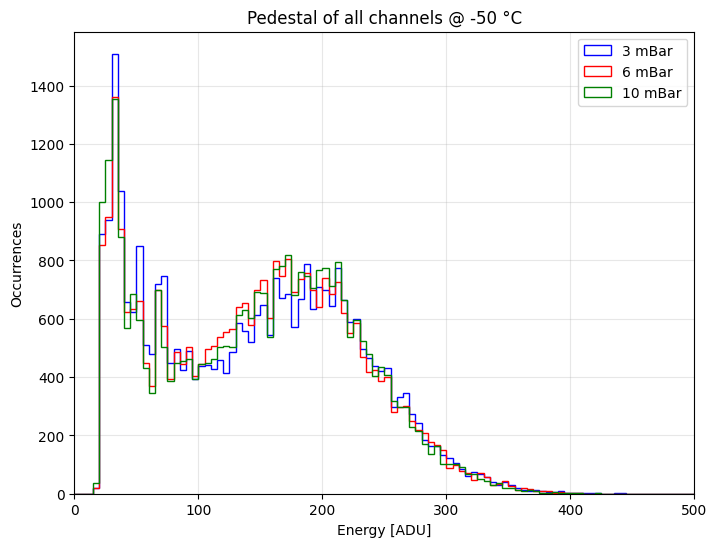

In [28]:
# Plot pedestal comparison at -50 and 3, 6, 10 mbar
ped_alltemps_press = read_data("ped_alltemps_press", cache_folder)

channels = range(0, 32)
matplotlib.rcParams["figure.figsize"] = [8, 6]

plt.clf()

# 3 mbar
ped_temp_press_ch_3mbar = ped_alltemps_press[
    (ped_alltemps_press["temperature"] == -50) & (ped_alltemps_press["pressure"] == 3)
]["pedestal"]
ped_temp_press_ch_3mbar = reject_outliers(ped_temp_press_ch_3mbar, np.mean(ped_temp_press_ch_3mbar))
plt.hist(
    ped_temp_press_ch_3mbar,
    bins=range(0, 1000, 5),
    histtype="step",
    stacked=True,
    fill=False,
    color="blue",
    label="3 mBar",
)

# 6 mbar
ped_temp_press_ch_6mbar = ped_alltemps_press[
    (ped_alltemps_press["temperature"] == -50) & (ped_alltemps_press["pressure"] == 6)
]["pedestal"]
ped_temp_press_ch_6mbar = reject_outliers(ped_temp_press_ch_6mbar, np.mean(ped_temp_press_ch_6mbar))
plt.hist(
    ped_temp_press_ch_6mbar,
    bins=range(0, 1000, 5),
    histtype="step",
    stacked=True,
    fill=False,
    color="red",
    label="6 mBar",
)

# 6 mbar
ped_temp_press_ch_10mbar= ped_alltemps_press[
    (ped_alltemps_press["temperature"] == -50) & (ped_alltemps_press["pressure"] == 10)
]["pedestal"]
ped_temp_press_ch_10mbar = reject_outliers(ped_temp_press_ch_10mbar, np.mean(ped_temp_press_ch_10mbar))
plt.hist(
    ped_temp_press_ch_10mbar,
    bins=range(0, 1000, 5),
    histtype="step",
    stacked=True,
    fill=False,
    color="green",
    label="10 mBar",
)

plt.yscale("log")
plt.xlim([0, 500])
plt.xlabel("Energy [ADU]")
plt.ylabel("Occurrences")
plt.title("Pedestal of all channels @ -50 °C")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

plt.clf()

# 3 mbar
ped_temp_press_ch_3mbar = ped_alltemps_press[
    (ped_alltemps_press["temperature"] == -50) & (ped_alltemps_press["pressure"] == 3)
]["pedestal"]
ped_temp_press_ch_3mbar = reject_outliers(ped_temp_press_ch_3mbar, np.mean(ped_temp_press_ch_3mbar))
plt.hist(
    ped_temp_press_ch_3mbar,
    bins=range(0, 1000, 5),
    histtype="step",
    stacked=True,
    fill=False,
    color="blue",
    label="3 mBar",
)

# 6 mbar
ped_temp_press_ch_6mbar = ped_alltemps_press[
    (ped_alltemps_press["temperature"] == -50) & (ped_alltemps_press["pressure"] == 6)
]["pedestal"]
ped_temp_press_ch_6mbar = reject_outliers(ped_temp_press_ch_6mbar, np.mean(ped_temp_press_ch_6mbar))
plt.hist(
    ped_temp_press_ch_6mbar,
    bins=range(0, 1000, 5),
    histtype="step",
    stacked=True,
    fill=False,
    color="red",
    label="6 mBar",
)

# 6 mbar
ped_temp_press_ch_10mbar= ped_alltemps_press[
    (ped_alltemps_press["temperature"] == -50) & (ped_alltemps_press["pressure"] == 10)
]["pedestal"]
ped_temp_press_ch_10mbar = reject_outliers(ped_temp_press_ch_10mbar, np.mean(ped_temp_press_ch_10mbar))
plt.hist(
    ped_temp_press_ch_10mbar,
    bins=range(0, 1000, 5),
    histtype="step",
    stacked=True,
    fill=False,
    color="green",
    label="10 mBar",
)

plt.xlim([0, 500])
plt.legend()
plt.xlabel("Energy [ADU]")
plt.ylabel("Occurrences")
plt.title("Pedestal of all channels @ -50 °C")
plt.grid(alpha=0.3)
plt.show()
